# Indicators and Markets

## This notebook contains the cleaning part and EDA of the Capstone project

### Data wrangling 

Loading all the data

In [1]:
import math
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns
from scipy.signal import find_peaks

In [2]:
# Load macroeconomic indicators and financial market data
dff = pd.read_csv("DFF.csv")  # Federal Reserve Effective Rate (daily)
reaintratrearat10y = pd.read_csv("REAINTRATREARAT10Y.csv")  # 10-Year Real Interest Rate (monthly)
unrate = pd.read_csv("UNRATE.csv")  # Unemployment Rate (monthly)
wm2ns = pd.read_csv("WM2NS.csv")  # M2 Money Supply (weekly)
m2real = pd.read_csv("M2REAL.csv")  # Real M2 Money Stock (monthly)
psavert = pd.read_csv("PSAVERT.csv")  # Personal Savings Rate (monthly)
dxy = pd.read_csv("DXY.csv")  # US Dollar Index (daily)
tresegcnm052n = pd.read_csv("TRESEGCNM052N.csv")  # Total Reserves (monthly)
xau = pd.read_csv("XAU.csv")  # Gold Price (daily)
oil = pd.read_csv("OIL.csv")  # Crude Oil Price (daily)
vix = pd.read_csv("VIXCLS.csv")  # CBOE Volatility Index (daily)
bopgstb = pd.read_csv("BOPGSTB.csv")  # Trade Balance (monthly)
rheacbw027sbog = pd.read_csv("RHEACBW027SBOG.csv")  # Real Estate Activity (weekly)
btc = pd.read_csv("BTC.csv")  # Bitcoin Price (daily)
etfs = pd.read_csv("ETFs.csv")  # S&P 500 Index (daily)

For ease of cleaning, will make a dictionary of all data:

In [3]:
# Dictionary to store DataFrames with their names
all_data = {
    "dff": dff,
    "reaintratrearat10y": reaintratrearat10y,
    "unrate": unrate,
    "wm2ns": wm2ns,
    "m2real": m2real,
    "psavert": psavert,
    "dxy": dxy,
    "tresegcnm052n": tresegcnm052n,
    "xau": xau,
    "oil": oil,
    "vix": vix,
    "bopgstb": bopgstb,
    "rheacbw027sbog": rheacbw027sbog,
    "btc": btc,
    "etfs": etfs
}

Checking for any empty columns

In [4]:
for name,df in all_data.items():
    print(name.upper())
    print(df.isnull().sum()/df.shape[0])
    print("")

DFF
observation_date    0.0
DFF                 0.0
Unnamed: 2          1.0
Unnamed: 3          1.0
Unnamed: 4          1.0
dtype: float64

REAINTRATREARAT10Y
observation_date      0.0
REAINTRATREARAT10Y    0.0
dtype: float64

UNRATE
observation_date    0.0
UNRATE              0.0
dtype: float64

WM2NS
observation_date    0.0
WM2NS               0.0
dtype: float64

M2REAL
observation_date    0.0
M2REAL              0.0
dtype: float64

PSAVERT
observation_date    0.0
PSAVERT             0.0
dtype: float64

DXY
Date         0.000000
Open         0.180905
High         0.180905
Low          0.180905
Close        0.180905
Adj Close    0.180905
Volume       0.180905
dtype: float64

TRESEGCNM052N
observation_date    0.000000
TRESEGCNM052N       0.035461
dtype: float64

XAU
Date      0.0
Open      0.0
High      0.0
Low       0.0
Close     0.0
Volume    0.0
dtype: float64

OIL
date             0.000000
price            0.000000
percentChange    0.001984
change           0.001984
dtype: float64


Apparently, there are columns are completely empty. This is just a weird thing that happened in converting the data from .xlsx to .csv For now we will be deleting columns where >0.99 is empty:

In [5]:
data_cleansed=all_data
for name,df in data_cleansed.items():
    for column in df.columns:
        if (df[column].isnull().sum()/df.shape[0])>0.99: df.drop(column,axis=1,inplace=True)

In [6]:
for name,df in data_cleansed.items():
    print(name.upper())
    print(df.isnull().sum()/df.shape[0])
    print("")

DFF
observation_date    0.0
DFF                 0.0
dtype: float64

REAINTRATREARAT10Y
observation_date      0.0
REAINTRATREARAT10Y    0.0
dtype: float64

UNRATE
observation_date    0.0
UNRATE              0.0
dtype: float64

WM2NS
observation_date    0.0
WM2NS               0.0
dtype: float64

M2REAL
observation_date    0.0
M2REAL              0.0
dtype: float64

PSAVERT
observation_date    0.0
PSAVERT             0.0
dtype: float64

DXY
Date         0.000000
Open         0.180905
High         0.180905
Low          0.180905
Close        0.180905
Adj Close    0.180905
Volume       0.180905
dtype: float64

TRESEGCNM052N
observation_date    0.000000
TRESEGCNM052N       0.035461
dtype: float64

XAU
Date      0.0
Open      0.0
High      0.0
Low       0.0
Close     0.0
Volume    0.0
dtype: float64

OIL
date             0.000000
price            0.000000
percentChange    0.001984
change           0.001984
dtype: float64

VIX
observation_date    0.000000
VIXCLS              0.032463
dtype: fl

Now, combining all data into one DataFrame and aligning the data using date as primary key

In order to combine data, unifing data types and names -if applicable- "especially for the primary key" are essential

In [7]:
for name,df in data_cleansed.items():
    print(name.upper())
    print(df.dtypes)
    print("")

DFF
observation_date     object
DFF                 float64
dtype: object

REAINTRATREARAT10Y
observation_date       object
REAINTRATREARAT10Y    float64
dtype: object

UNRATE
observation_date     object
UNRATE              float64
dtype: object

WM2NS
observation_date     object
WM2NS               float64
dtype: object

M2REAL
observation_date     object
M2REAL              float64
dtype: object

PSAVERT
observation_date     object
PSAVERT             float64
dtype: object

DXY
Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume       float64
dtype: object

TRESEGCNM052N
observation_date     object
TRESEGCNM052N       float64
dtype: object

XAU
Date       object
Open      float64
High      float64
Low       float64
Close     float64
Volume      int64
dtype: object

OIL
date              object
price            float64
percentChange    float64
change           float64
dtype: object

VIX
observation_date  

Unifying the primery key name across all DFs

In [8]:
data_cleansed['xau'].rename(columns={'Date':'observation_date'},inplace=True)
data_cleansed['oil'].rename(columns={'date':'observation_date'},inplace=True)
data_cleansed['etfs'].rename(columns={'Date':'observation_date'},inplace=True)
data_cleansed['dxy'].rename(columns={'Date':'observation_date'},inplace=True)

In [9]:
for name,df in data_cleansed.items():
    print(name)
    print(df['observation_date'].head(1))

dff
0    7/1/1954
Name: observation_date, dtype: object
reaintratrearat10y
0    1982-01-01
Name: observation_date, dtype: object
unrate
0    1948-01-01
Name: observation_date, dtype: object
wm2ns
0    1980-11-03
Name: observation_date, dtype: object
m2real
0    1959-01-01
Name: observation_date, dtype: object
psavert
0    1959-01-01
Name: observation_date, dtype: object
dxy
0    1971-01-04
Name: observation_date, dtype: object
tresegcnm052n
0    1977-12-01
Name: observation_date, dtype: object
xau
0    2004.06.11 00:00
Name: observation_date, dtype: object
oil
0    1983-03-01 00:00:00+00:00
Name: observation_date, dtype: object
vix
0    1/2/1990
Name: observation_date, dtype: object
bopgstb
0    1992-01-01
Name: observation_date, dtype: object
rheacbw027sbog
0    1987-06-17
Name: observation_date, dtype: object
btc
0    12/1/2014
Name: observation_date, dtype: object
etfs
0    2015-02-17
Name: observation_date, dtype: object


In [10]:
for name,df in data_cleansed.items():
    print(name.upper())
    print(df.dtypes)
    print("")

DFF
observation_date     object
DFF                 float64
dtype: object

REAINTRATREARAT10Y
observation_date       object
REAINTRATREARAT10Y    float64
dtype: object

UNRATE
observation_date     object
UNRATE              float64
dtype: object

WM2NS
observation_date     object
WM2NS               float64
dtype: object

M2REAL
observation_date     object
M2REAL              float64
dtype: object

PSAVERT
observation_date     object
PSAVERT             float64
dtype: object

DXY
observation_date     object
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume              float64
dtype: object

TRESEGCNM052N
observation_date     object
TRESEGCNM052N       float64
dtype: object

XAU
observation_date     object
Open                float64
High                float64
Low                 float64
Close               float64
Volume                int64
dtype: object

OIL
observation_date     object


Changing names of columns to combine everything into one DF

In [11]:
for name,df in data_cleansed.items():
    print(name.upper())
    print(df.columns)
    print("")

DFF
Index(['observation_date', 'DFF'], dtype='object')

REAINTRATREARAT10Y
Index(['observation_date', 'REAINTRATREARAT10Y'], dtype='object')

UNRATE
Index(['observation_date', 'UNRATE'], dtype='object')

WM2NS
Index(['observation_date', 'WM2NS'], dtype='object')

M2REAL
Index(['observation_date', 'M2REAL'], dtype='object')

PSAVERT
Index(['observation_date', 'PSAVERT'], dtype='object')

DXY
Index(['observation_date', 'Open', 'High', 'Low', 'Close', 'Adj Close',
       'Volume'],
      dtype='object')

TRESEGCNM052N
Index(['observation_date', 'TRESEGCNM052N'], dtype='object')

XAU
Index(['observation_date', 'Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')

OIL
Index(['observation_date', 'price', 'percentChange', 'change'], dtype='object')

VIX
Index(['observation_date', 'VIXCLS'], dtype='object')

BOPGSTB
Index(['observation_date', 'BOPGSTB'], dtype='object')

RHEACBW027SBOG
Index(['observation_date', 'RHEACBW027SBOG'], dtype='object')

BTC
Index(['observation_date', 'CBBTCUSD

Appears that the datasets below needs column changes to make sense when a combined DF is made. Noting that only the adjusted close prices are used in the analysis
Also for consistance and ease of analysis, the column names are named after the DF name

In [12]:
data_cleansed['psavert']=data_cleansed['psavert'].rename(columns={'Adj Close':'PSAVERT'})
data_cleansed['dxy']=data_cleansed['dxy'].rename(columns={'Adj Close':'DXY'})
data_cleansed['xau']=data_cleansed['xau'].rename(columns={'Close':'XAU'})
data_cleansed['oil']=data_cleansed['oil'].rename(columns={'price':'OIL'})
data_cleansed['btc']=data_cleansed['btc'].rename(columns={'CBBTCUSD':'BTC'})
data_cleansed['vix']=data_cleansed['vix'].rename(columns={'VIXCLS':'VIX'})

data_cleansed['psavert']=data_cleansed['psavert'][['observation_date','PSAVERT']]
data_cleansed['dxy']=data_cleansed['dxy'][['observation_date','DXY']]
data_cleansed['xau']=data_cleansed['xau'][['observation_date','XAU']]
data_cleansed['oil']=data_cleansed['oil'][['observation_date','OIL']]

In [13]:
for data in data_cleansed.values():
    data['observation_date'] = pd.to_datetime(data['observation_date'])
    data['observation_date']=data['observation_date'].dt.tz_localize(None)

Checking the range of date for each DF. And determining the end and start dates

In [14]:
df_earliest_starting_date=['df',pd.to_datetime("2050-12-31")]
df_latest_ending_date=['df',pd.to_datetime("1900-01-01")]

for name, df in data_cleansed.items():
    max_date=df['observation_date'].max()
    min_date=df['observation_date'].min()

    if min_date<df_earliest_starting_date[1]: # Changed > to < to find earliest
        df_earliest_starting_date[0]=name
        df_earliest_starting_date[1]=min_date

    if max_date>df_latest_ending_date[1]: # Changed < to > to find latest
        df_latest_ending_date[0]=name
        df_latest_ending_date[1]=max_date

print(f"The earliest starting: {df_earliest_starting_date}") # Changed variable name in print
print(f"The latest ending: {df_latest_ending_date}") # Changed variable name in print

earliest_start_date = df_earliest_starting_date[1]
latest_end_date = df_latest_ending_date[1]

period = latest_end_date - earliest_start_date

print(f"The period between the earliest starting date ({earliest_start_date}) and the latest ending date ({latest_end_date}) is: {period}")
print(f"The period between the earliest starting date ({earliest_start_date}) and the latest ending date ({latest_end_date}) is: {period.days/365} years")

The earliest starting: ['unrate', Timestamp('1948-01-01 00:00:00')]
The latest ending: ['etfs', Timestamp('2025-02-13 00:00:00')]
The period between the earliest starting date (1948-01-01 00:00:00) and the latest ending date (2025-02-13 00:00:00) is: 28168 days 00:00:00
The period between the earliest starting date (1948-01-01 00:00:00) and the latest ending date (2025-02-13 00:00:00) is: 77.17260273972603 years


In [15]:
df_latest_starting_date=['df',pd.to_datetime("1900-01-01")]
df_earliest_ending_date=['df',pd.to_datetime("2050-12-31")]

for name, df in data_cleansed.items():
    max_date=df['observation_date'].max()
    min_date=df['observation_date'].min()

    if min_date>df_latest_starting_date[1]:
        df_latest_starting_date[0]=name
        df_latest_starting_date[1]=min_date

    if max_date<df_earliest_ending_date[1]:
        df_earliest_ending_date[0]=name
        df_earliest_ending_date[1]=max_date
        
print(f"The latest starting: {df_latest_starting_date}")
print(f"The earliest ending:{df_earliest_ending_date}")

The latest starting: ['etfs', Timestamp('2015-02-17 00:00:00')]
The earliest ending:['dxy', Timestamp('2024-04-05 00:00:00')]


The latest starting point is 2014-12-18 of the "etfs" DF and the earliest ending date is 2024-04-05 of "psavert" DF. Thus, the period from 2015-01-01 and 2024-05-01 is taken.

As for now, to align dates together, will create a column containing all dates between the latest and earliest dates exisited in all data sets.

In [16]:
df_data=pd.DataFrame({'observation_date':date} for date in pd.date_range(start="2015-01-01", end="2024-05-01"))

Now, will left join the data to have only one DF of all data between the earliest ending and latest starting dates

In [17]:
for name,df in data_cleansed.items():
    df_data=pd.merge(df_data,df,how='left')

Now:

1- Make date the index

2- Relample by the mean for each month for every feature

In [18]:
df_data = df_data.set_index('observation_date')

In [19]:
df_data

,DFF,REAINTRATREARAT10Y,UNRATE,WM2NS,M2REAL,PSAVERT,DXY,TRESEGCNM052N,XAU,OIL,...,VOO,VTI,VTV,VUG,VWO,VXUS,XLE,XLF,XLG,XLK
observation_date,,,,,,,,,,,,,,,,,,,,,
2015-01-01,0.06,0.709943,5.7,NaN,5015.7,6.3,NaN,3.829024e+06,NaN,48.24,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-02,0.12,NaN,NaN,NaN,NaN,NaN,91.080002,NaN,1188.82,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-03,0.12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-04,0.12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-05,0.12,NaN,NaN,11830.1,NaN,NaN,91.379997,NaN,1204.32,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-04-27,5.33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-04-28,5.33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-04-29,5.33,NaN,NaN,20783.2,NaN,NaN,NaN,NaN,2336.35,NaN,...,464.243011,250.296387,155.789246,334.797058,41.449642,57.991817,94.049881,40.280750,40.987167,199.652191


In [20]:
resampled_data=df_data.resample('M').mean()

C:\Users\bahra\AppData\Local\Temp\ipykernel_21812\483978271.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  resampled_data=df_data.resample('M').mean()


To focus on these only

Assets: OIL, XAU, SPY

Policy tools: DFF, WM2NS, M2REAL, REAINTRATREARAT10Y

Economic indicators: CORESTICKM159SFRBATL, UNRATE, PSAVERT, DXY, TRESEGCNM052N, VIX, BOPGSTB, RHEACBW027SBOG

In [21]:
analyzed_data=resampled_data[['OIL','XAU','SPY','DFF','WM2NS','M2REAL','REAINTRATREARAT10Y','UNRATE','PSAVERT','DXY','TRESEGCNM052N','VIX','BOPGSTB','RHEACBW027SBOG']]

In [22]:
analyzed_data.to_csv("analyzed_data.csv")

To take a look at time progression

array([<Axes: xlabel='observation_date'>,
       <Axes: xlabel='observation_date'>,
       <Axes: xlabel='observation_date'>,
       <Axes: xlabel='observation_date'>,
       <Axes: xlabel='observation_date'>,
       <Axes: xlabel='observation_date'>,
       <Axes: xlabel='observation_date'>,
       <Axes: xlabel='observation_date'>,
       <Axes: xlabel='observation_date'>,
       <Axes: xlabel='observation_date'>,
       <Axes: xlabel='observation_date'>,
       <Axes: xlabel='observation_date'>,
       <Axes: xlabel='observation_date'>,
       <Axes: xlabel='observation_date'>], dtype=object)

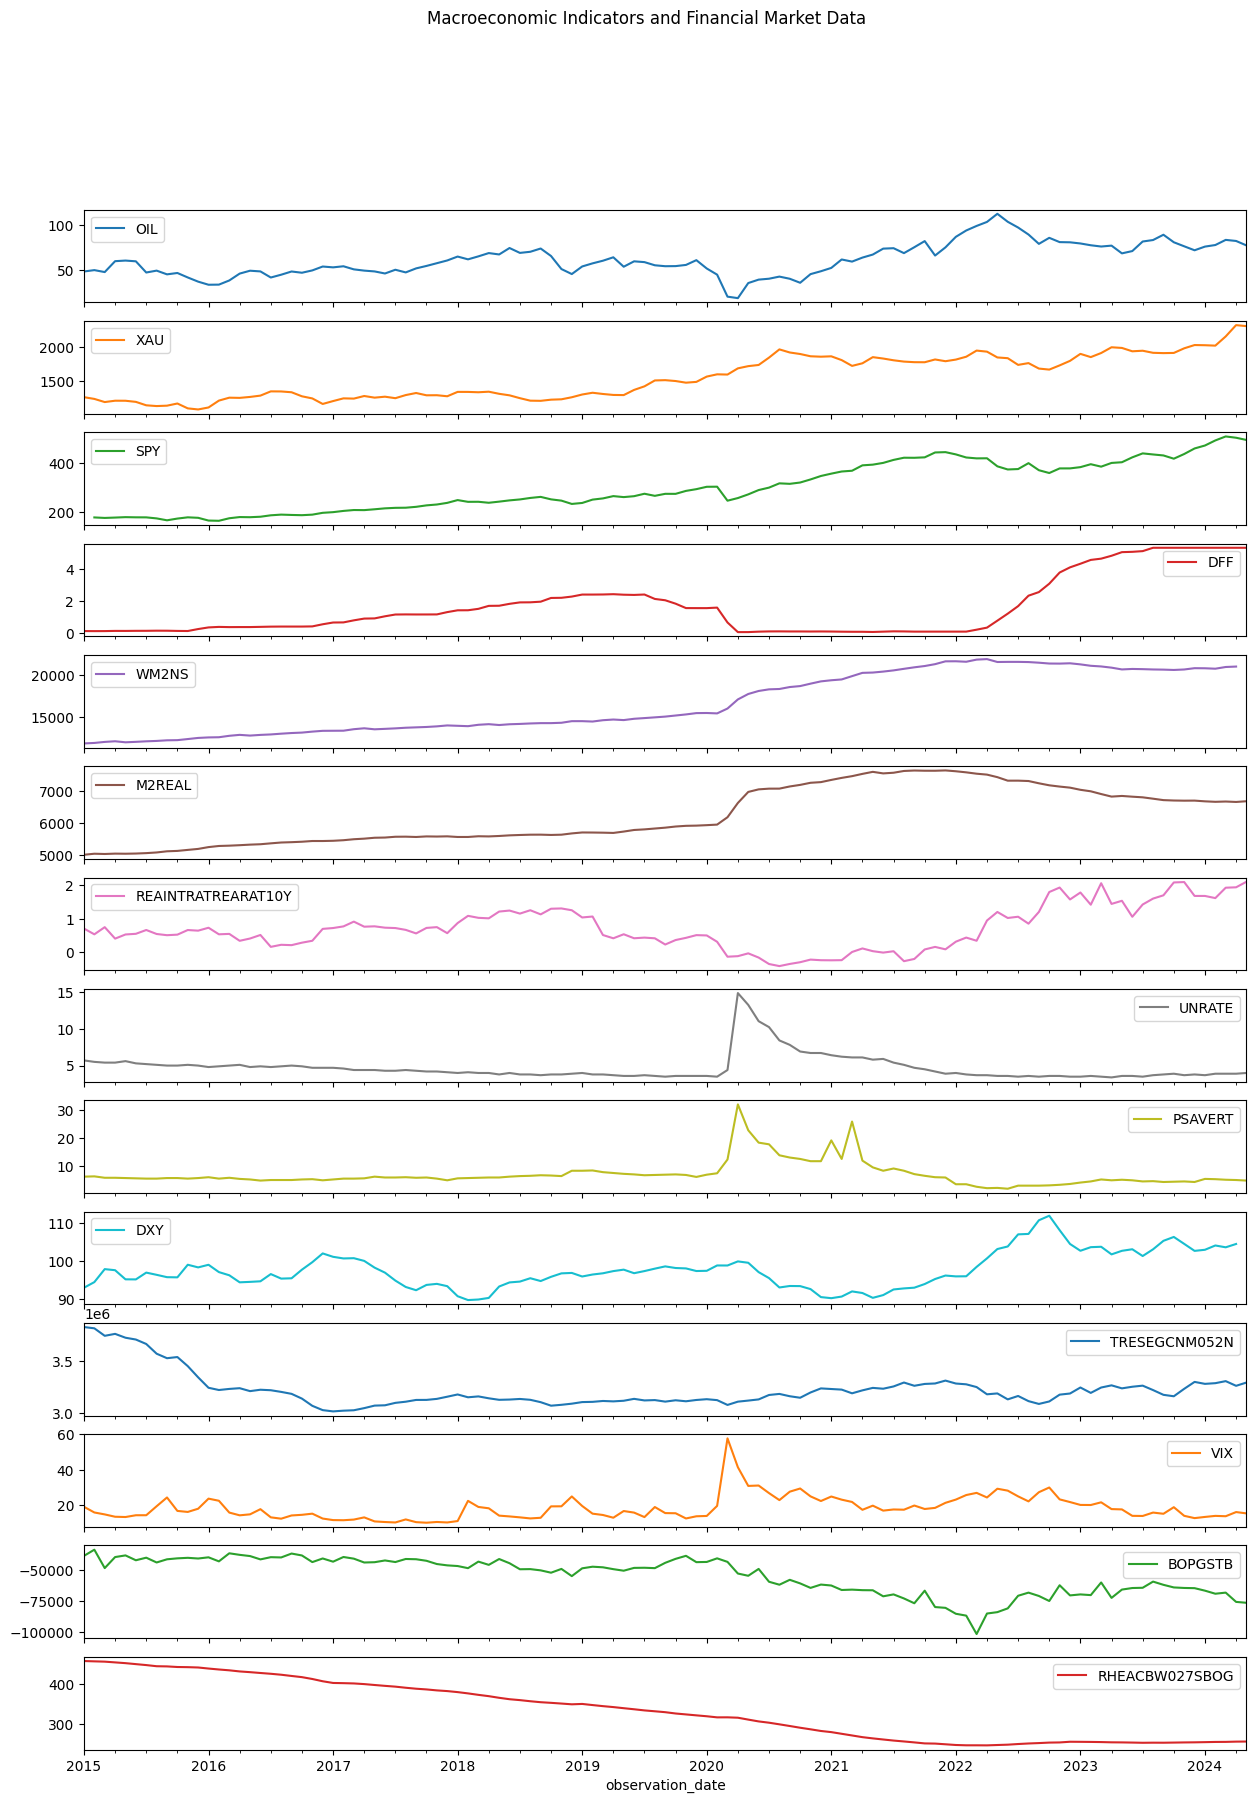

In [23]:
analyzed_data.plot(subplots=True, figsize=(15, 20), title="Macroeconomic Indicators and Financial Market Data")

How the distributition of all features

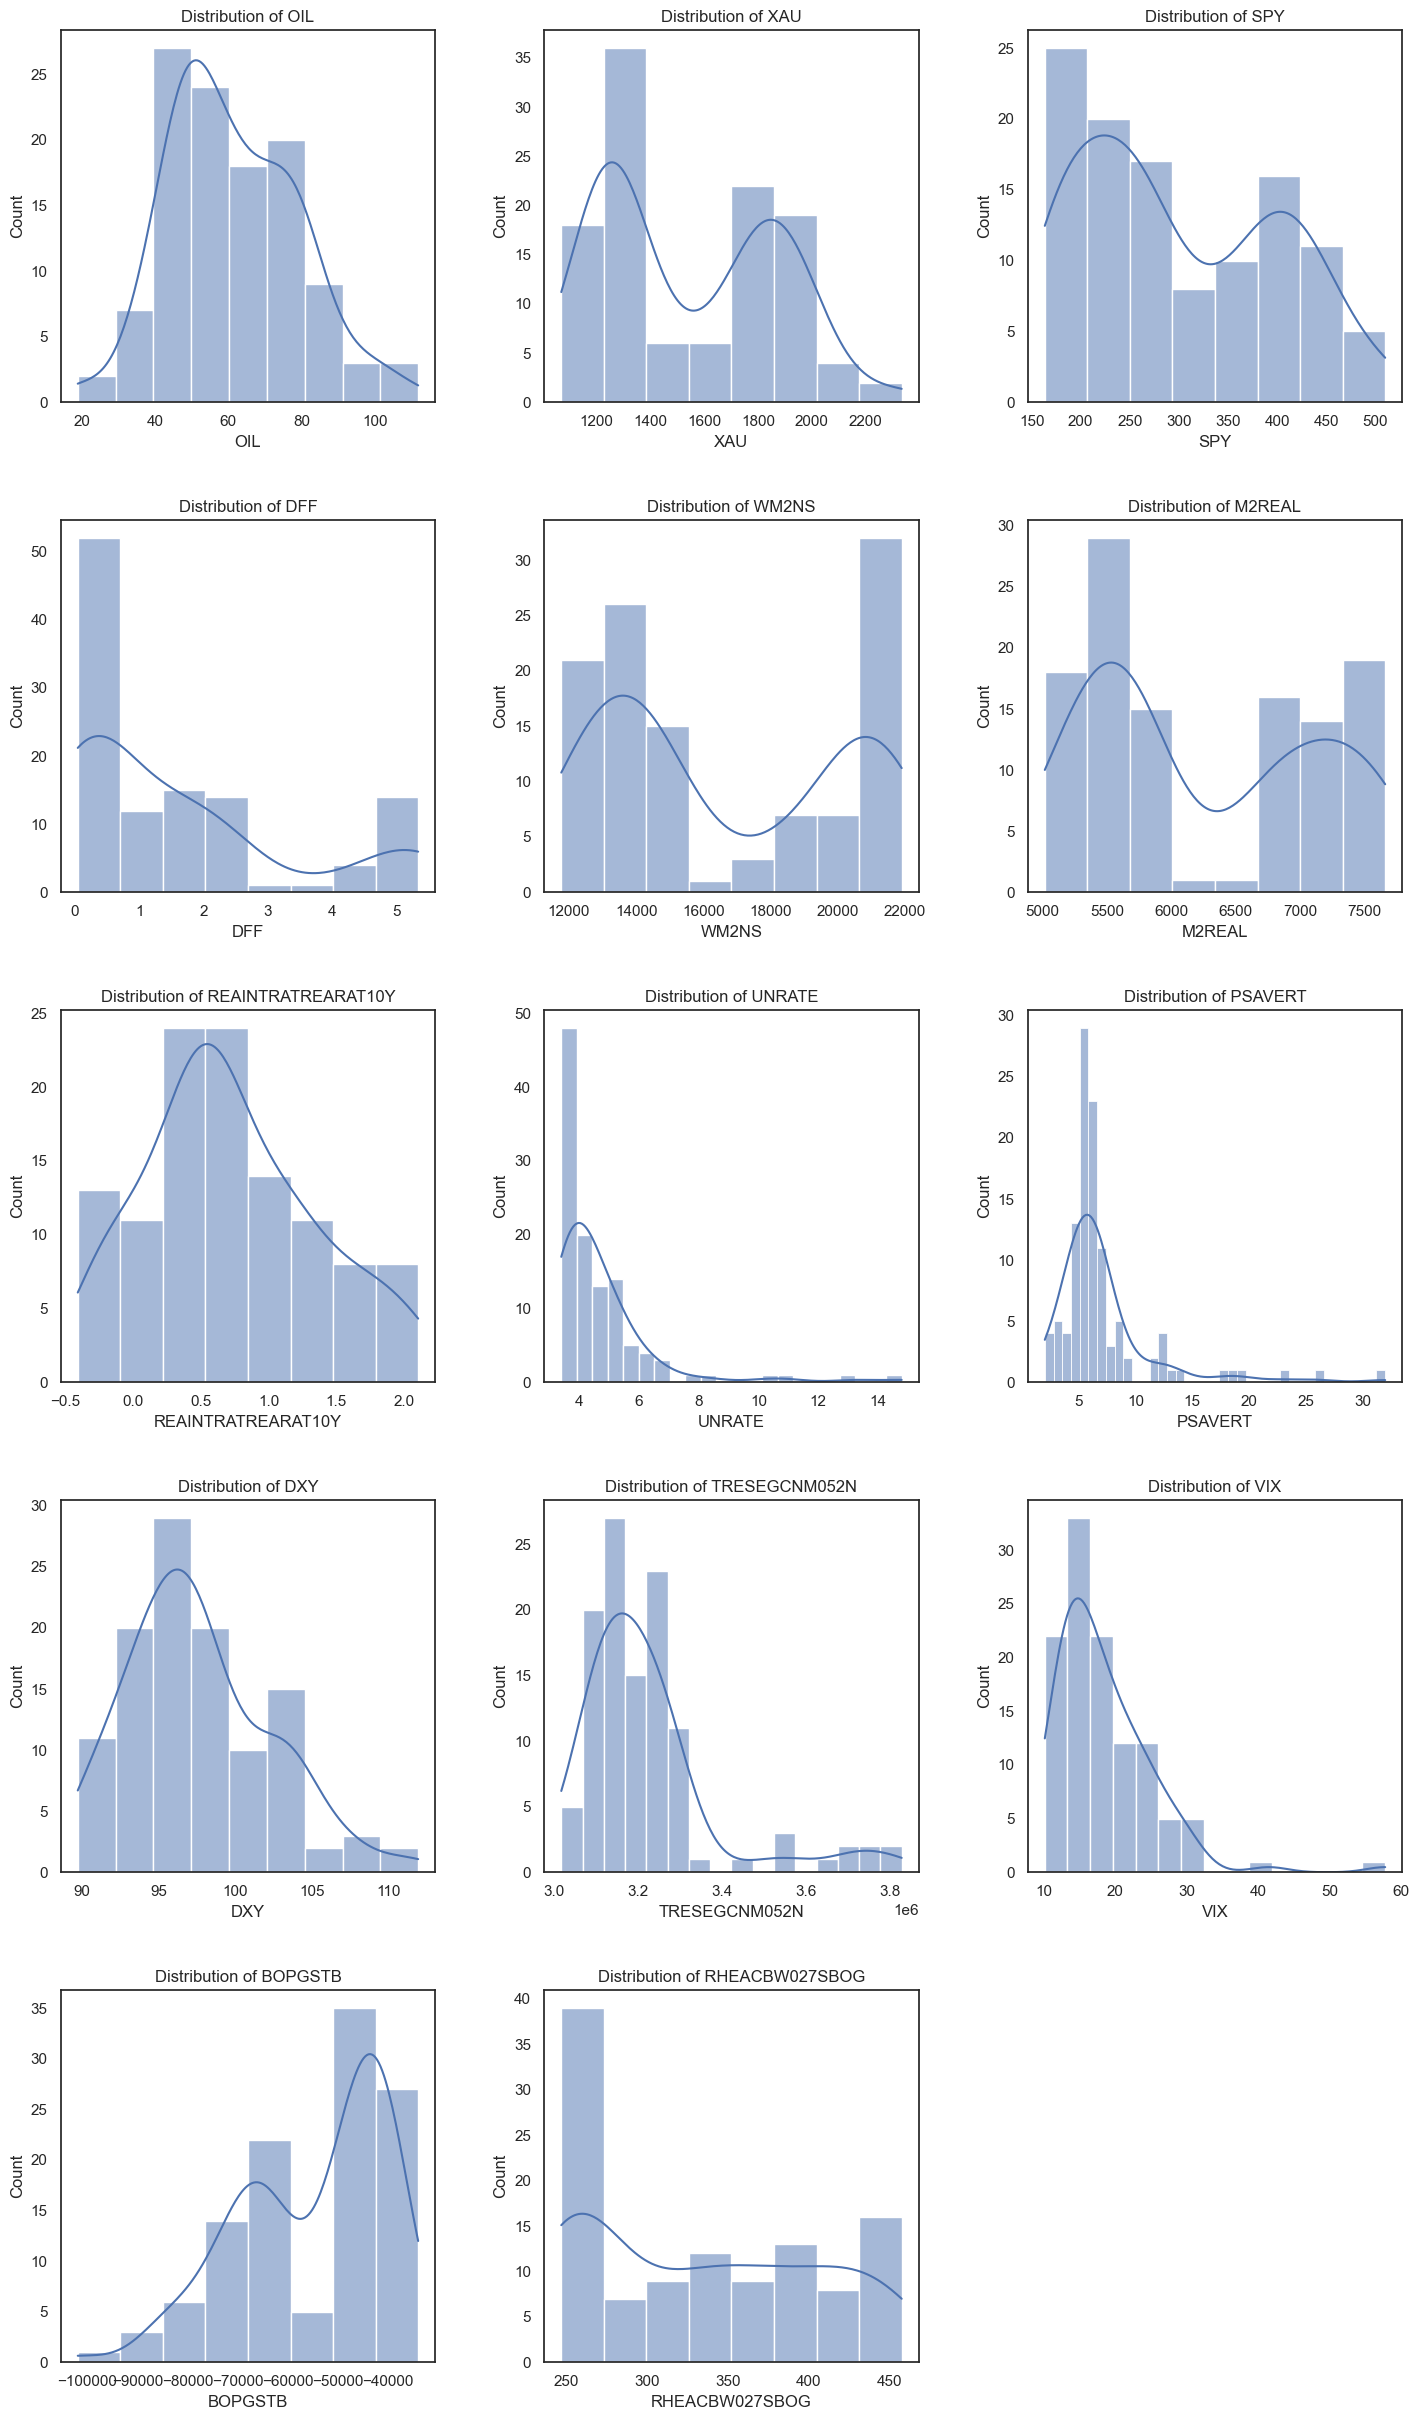

In [24]:
sns.set_theme(style='white')

features = analyzed_data.columns
n_features = len(features)
n_cols = 3 
n_rows = math.ceil(n_features / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))
axes = axes.flatten()

for ax, feature in zip(axes, features):
    sns.histplot(analyzed_data[feature], kde=True, ax=ax)
    ax.set_title(f"Distribution of {feature}")

# Hide any unused subplots
for ax in axes[len(features):]:
    ax.set_visible(False)

# Add padding between plots
plt.tight_layout(pad=3.0)
plt.show()

For comparison, percentage change of a feature and its value in the previous month

In [25]:
data_pct=analyzed_data.pct_change().dropna()

C:\Users\bahra\AppData\Local\Temp\ipykernel_21812\243948279.py:1: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  data_pct=analyzed_data.pct_change().dropna()


In [26]:
data_pct.describe()

,OIL,XAU,SPY,DFF,WM2NS,M2REAL,REAINTRATREARAT10Y,UNRATE,PSAVERT,DXY,TRESEGCNM052N,VIX,BOPGSTB,RHEACBW027SBOG
count,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000
mean,0.012553,0.006242,0.009950,0.073699,0.005237,0.002596,-0.005014,0.008700,0.017441,0.001019,-0.001269,0.022594,0.011116,-0.005173
std,0.134788,0.031634,0.035268,0.270906,0.010081,0.010309,1.477715,0.230466,0.234597,0.014802,0.010401,0.261834,0.088982,0.005204
min,-0.542449,-0.067228,-0.189548,-0.924876,-0.015910,-0.014796,-8.448937,-0.176471,-0.536680,-0.033959,-0.031238,-0.311259,-0.182549,-0.015534
25%,-0.058229,-0.013921,-0.005957,-0.000339,0.000050,-0.001491,-0.180851,-0.027778,-0.057079,-0.008099,-0.007678,-0.101703,-0.038758,-0.008448
50%,0.018000,-0.000476,0.015169,0.008602,0.004617,0.001907,0.011604,-0.016129,0.000000,0.001182,0.001075,-0.013803,0.008019,-0.005402
75%,0.072294,0.026597,0.031990,0.078079,0.008704,0.004610,0.197040,0.020000,0.033986,0.009564,0.004978,0.091480,0.051359,-0.001332
max,0.883758,0.093791,0.065119,1.512097,0.068630,0.072220,8.438568,2.363636,1.580645,0.036210,0.022639,1.941412,0.437395,0.006776


Check for correlation between assets and other features

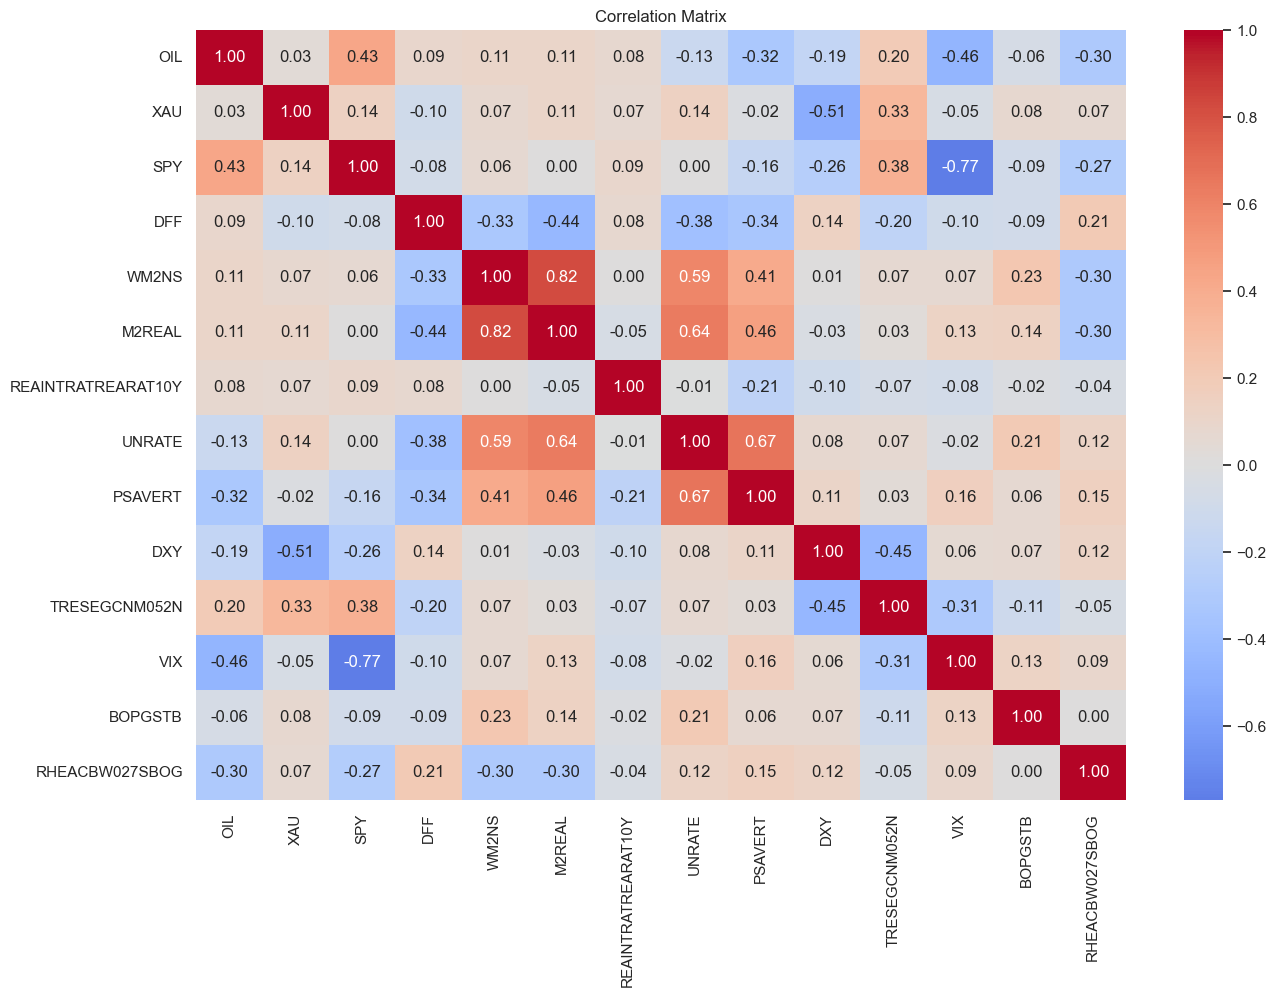

In [27]:
sns.set_theme(style='white')

plt.figure(figsize=(15, 10))
sns.heatmap(data_pct.corr(), annot=True, fmt=".2f", cmap="coolwarm",center=0)
plt.title("Correlation Matrix")
plt.show()

To standardarize all plots

In [28]:
sns.set_theme(context="talk", style="white")

size = 20
text_color='black'
background_color='white'

mpl.rcParams.update({

    # figure settings
    'figure.figsize': (13.3, 7.5),

    # font settings
    'font.family': 'roboto',

    # title settings
    'axes.titlesize': size * 1.5,
    'axes.titleweight': 'bold',
    'axes.titlepad': size,
    'axes.titlecolor': text_color,  

    # label settings
    'axes.labelsize': size,
    'axes.labelweight': 'bold',
    'axes.labelpad': size,
    'axes.labelcolor': text_color,  
    'xtick.labelsize': size,
    'ytick.labelsize': size,
    'xtick.color': text_color,       
    'ytick.color': text_color,       
    'xtick.labelcolor': text_color, 
    'ytick.labelcolor': text_color, 

    # legend settings
    'legend.fontsize': size,
    'legend.facecolor': background_color,
    'legend.edgecolor': text_color,
    'legend.labelcolor': text_color,

    # grid settings
    'axes.facecolor': background_color,
    'figure.facecolor': background_color,
    'savefig.facecolor': background_color,
})

Analyze SPY vs VIX as they have high correlation


To plot SPY and VIX to compere

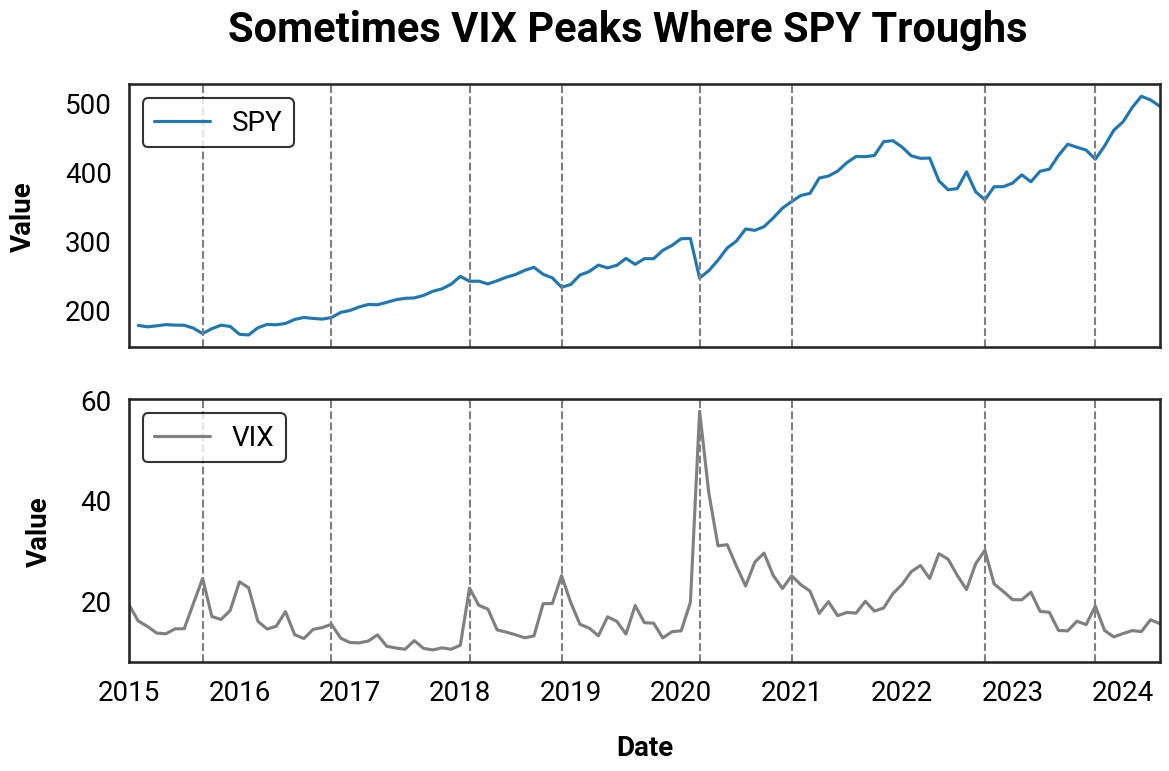

In [29]:
# Detect peaks in the VIX series.
peaks_indices, _ = find_peaks(analyzed_data['VIX'], distance=10)
peak_dates = analyzed_data.index[peaks_indices]

axes = analyzed_data[['SPY', 'VIX']].plot(
    subplots=True, 
    color=["tab:blue", "gray"],
)

plt.suptitle("Sometimes VIX Peaks Where SPY Troughs", fontweight='bold', fontsize=size*1.5, color=text_color)

for ax in axes:
    for date in peak_dates:
        ax.axvline(x=date, color='grey', linestyle='--', linewidth=1.5)
    ax.set_title(ax.get_title())
    ax.legend(loc='upper left')
    ax.set_ylabel("Value",fontweight='bold')
    ax.set_xlabel("Date",fontweight='bold')

plt.show()

To plot the percentage change and look for any similarities with peaks

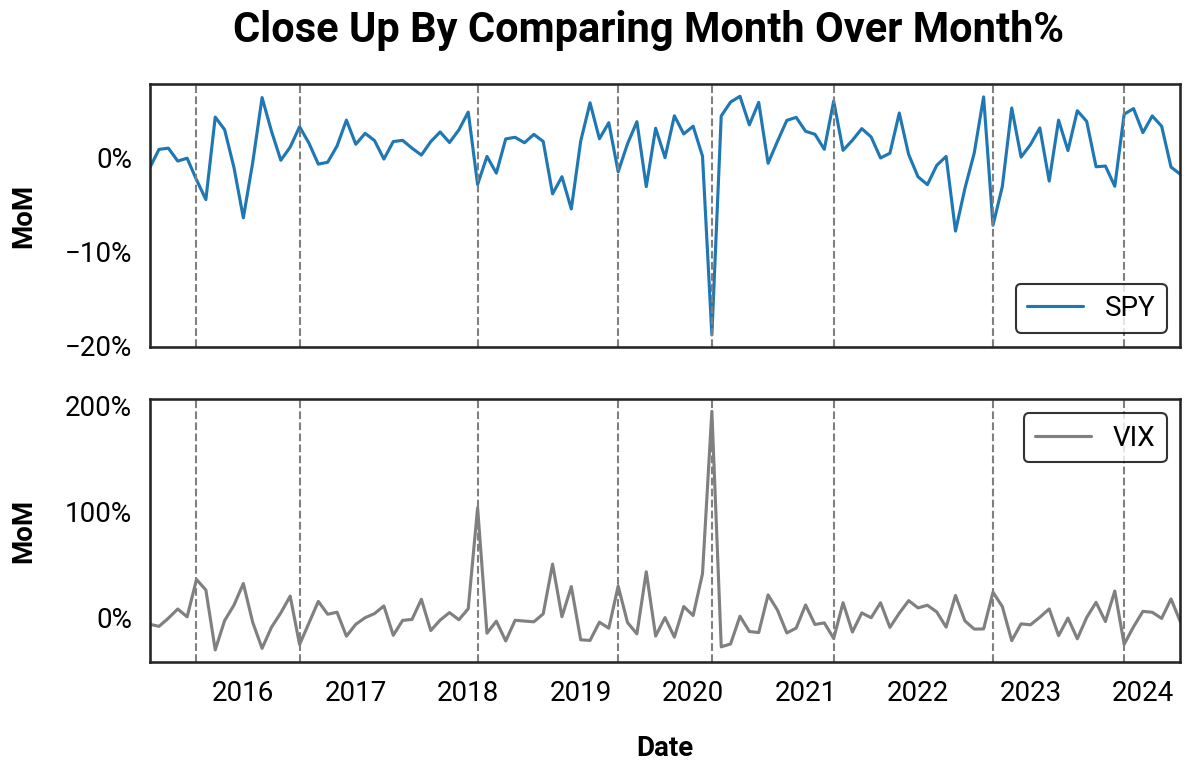

In [30]:
# Detect peaks in the VIX series. 
peaks_indices, _ = find_peaks(abs(data_pct['VIX']), distance=10)
peak_dates = data_pct.index[peaks_indices]

axes = data_pct[['SPY', 'VIX']].plot(
    subplots=True, 
    # title="MoM Over Time",
    color=["tab:blue", "gray"]
)


plt.suptitle("Close Up By Comparing Month Over Month%", fontweight='bold', fontsize=size*1.5, color=text_color)

# Draw vertical lines at each SPY peak across both subplots
for ax in axes:
    for date in peak_dates:
        ax.axvline(x=date, color='grey', linestyle='--', linewidth=1.5)
    ax.legend(loc='best')
    ax.set_ylabel("MoM")
    ax.set_xlabel("Date")
    ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0, decimals=0))

plt.show()

To make a scatter plot for SPY vs VIX

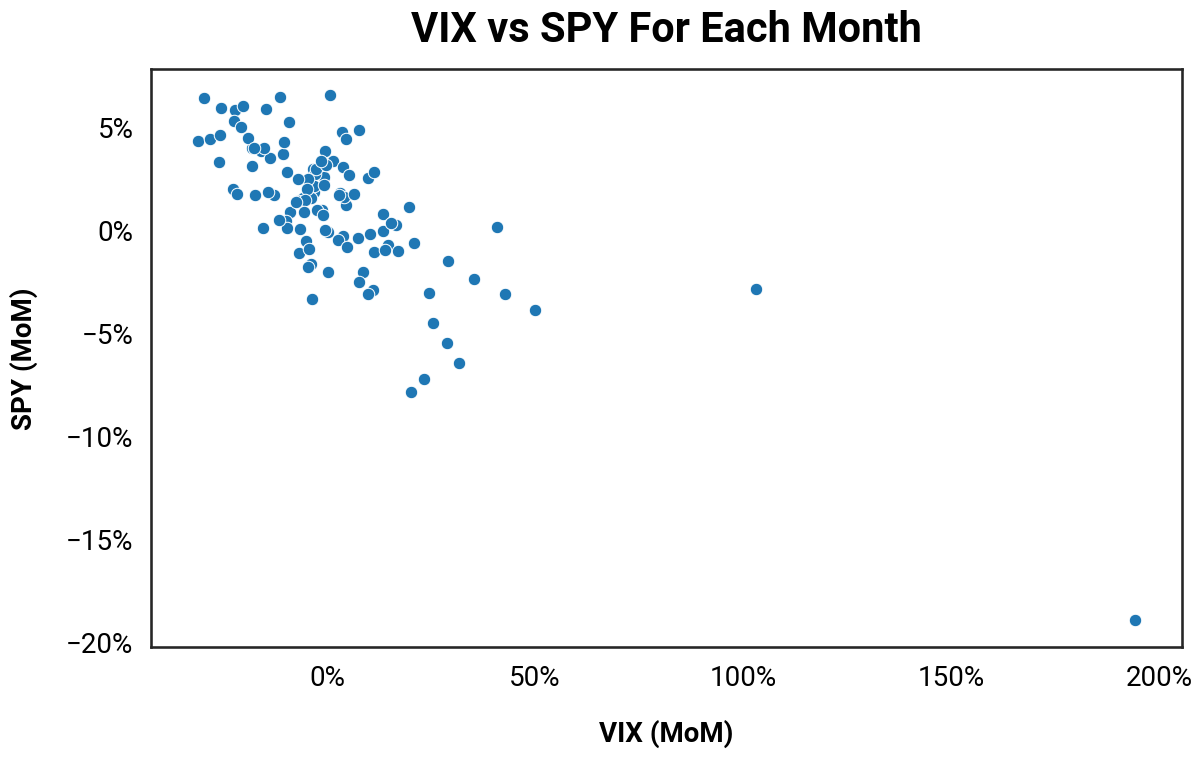

In [31]:
sns.scatterplot(x=data_pct["VIX"], y=data_pct["SPY"], color='tab:blue')
plt.xlabel("VIX (MoM)")
plt.ylabel("SPY (MoM)")
plt.title("VIX vs SPY For Each Month")
# Format tick values as percentages
ax = plt.gca()
ax.xaxis.set_major_formatter(mtick.PercentFormatter(1.0,decimals=0))
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0, decimals=0))

plt.show()

To add x,y=0 lines and show that the third quarter is empty

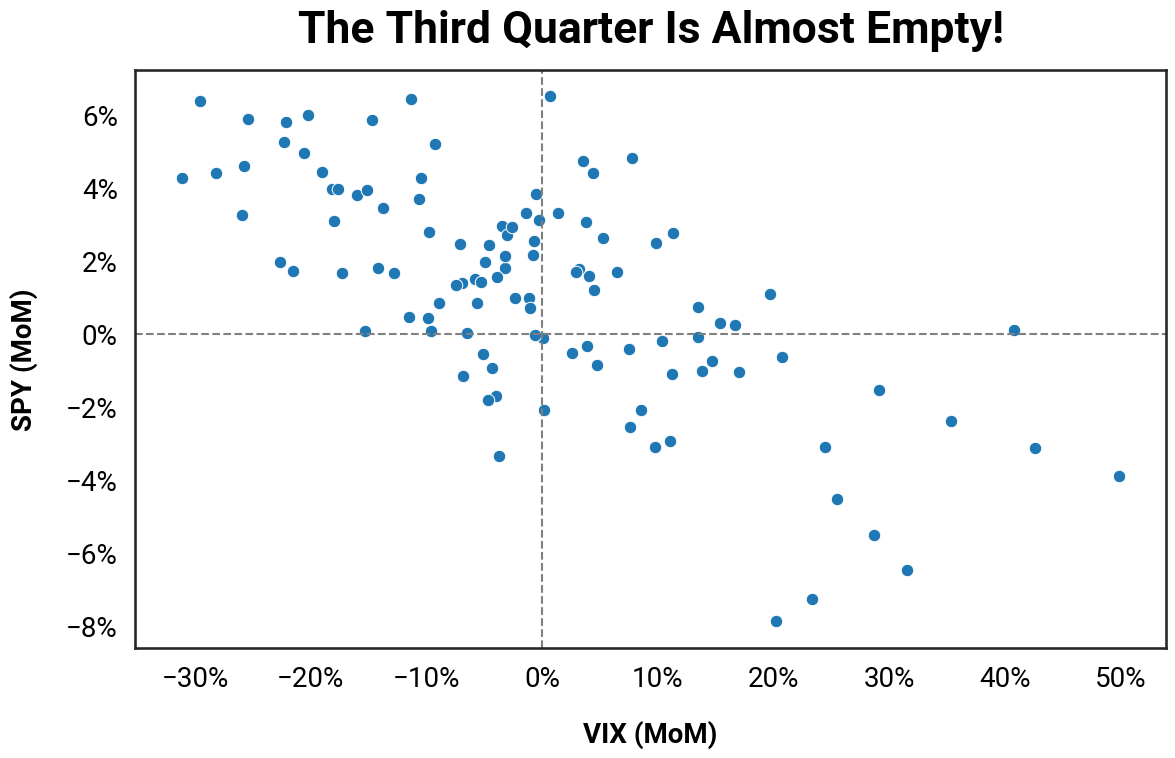

In [32]:
data_plot=data_pct[data_pct['VIX']<0.5]

sns.scatterplot(x=data_plot["VIX"], y=data_plot["SPY"], color='tab:blue')

# Draw horizontal and vertical lines at 0
plt.axhline(y=0, color='gray', linestyle='--', linewidth=1.5)
plt.axvline(x=0, color='gray', linestyle='--', linewidth=1.5)

plt.title("The Third Quarter Is Almost Empty!", fontsize=32, fontweight='bold')
plt.xlabel("VIX (MoM)")
plt.ylabel("SPY (MoM)")

# Format tick values as percentages
ax = plt.gca()
ax.xaxis.set_major_formatter(mtick.PercentFormatter(1.0,decimals=0))
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0, decimals=0))

plt.show()

Make a 2*2 probability distribution

C:\Users\bahra\AppData\Local\Temp\ipykernel_21812\1588011095.py:9: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  annot = cont_table.applymap(lambda x: f"{x:.01f}%")


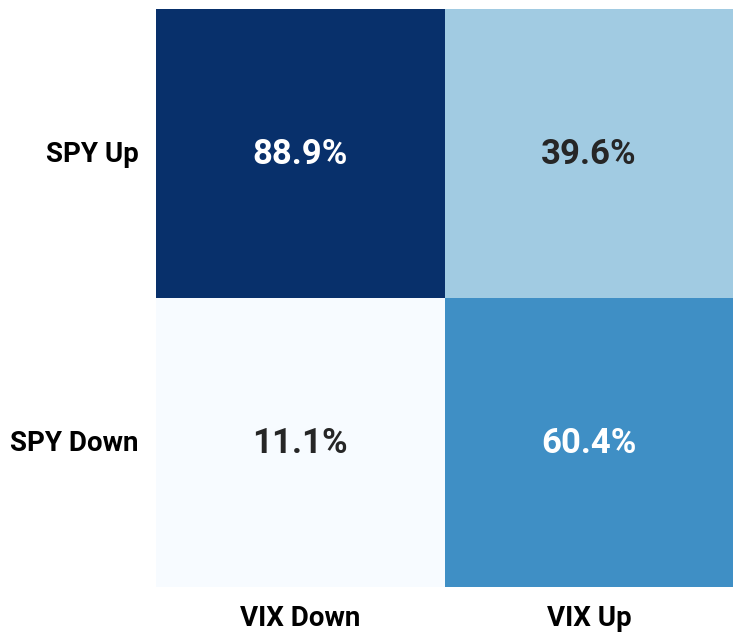

In [33]:
# Create binary columns for S&P up/down and VIX up/down
data_pct['SPY_UpDown'] = np.where(data_pct['SPY'] > 0, 'SPY Up', 'SPY Down')
data_pct['VIX_UpDown'] = np.where(data_pct['VIX'] > 0, 'VIX Up', 'VIX Down')

# Create a contingency table
cont_table = pd.crosstab(data_pct['SPY_UpDown'], data_pct['VIX_UpDown'], normalize='columns')
cont_table = cont_table.reindex(['SPY Up', 'SPY Down'])*100

annot = cont_table.applymap(lambda x: f"{x:.01f}%")
sns.heatmap(cont_table, annot=annot, fmt="", cmap='Blues', cbar=False, square=True, annot_kws={"fontweight": 'bold', "fontsize": 1.25*size}) 

plt.xlabel('')
plt.ylabel('')

ax = plt.gca()
plt.setp(ax.get_xticklabels(), fontweight="bold")
plt.setp(ax.get_yticklabels(), fontweight="bold", rotation=0, ha="right")


plt.show()


Do the same again for the pairs (VXICLS,OIL)

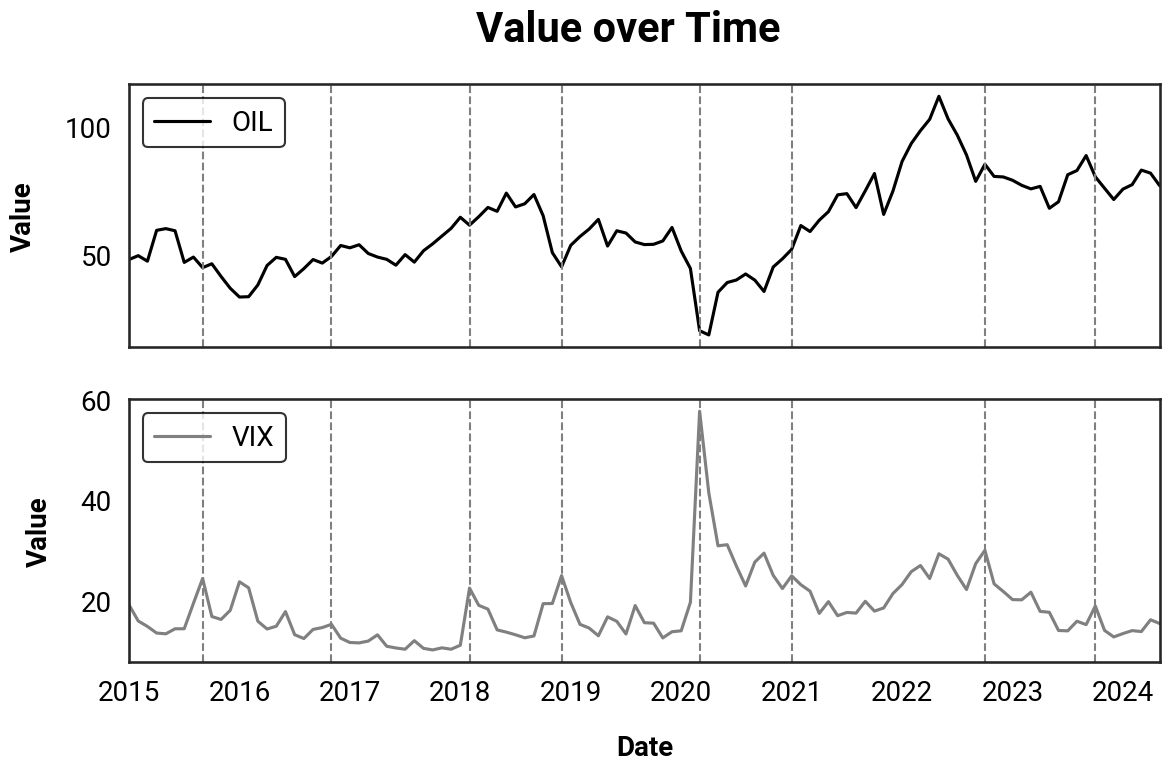

In [34]:
# Detect peaks in the VIX series.
peaks_indices, _ = find_peaks(analyzed_data['VIX'], distance=10)
peak_dates = analyzed_data.index[peaks_indices]

axes = analyzed_data[['OIL', 'VIX']].plot(
    subplots=True, 
    color=["black", "gray"],
)

plt.suptitle("Value over Time", fontweight='bold', fontsize=size*1.5, color=text_color)

for ax in axes:
    for date in peak_dates:
        ax.axvline(x=date, color='grey', linestyle='--', linewidth=1.5)
    ax.set_title(ax.get_title())
    ax.legend(loc='upper left')
    ax.set_ylabel("Value",fontweight='bold')
    ax.set_xlabel("Date",fontweight='bold')

plt.show()

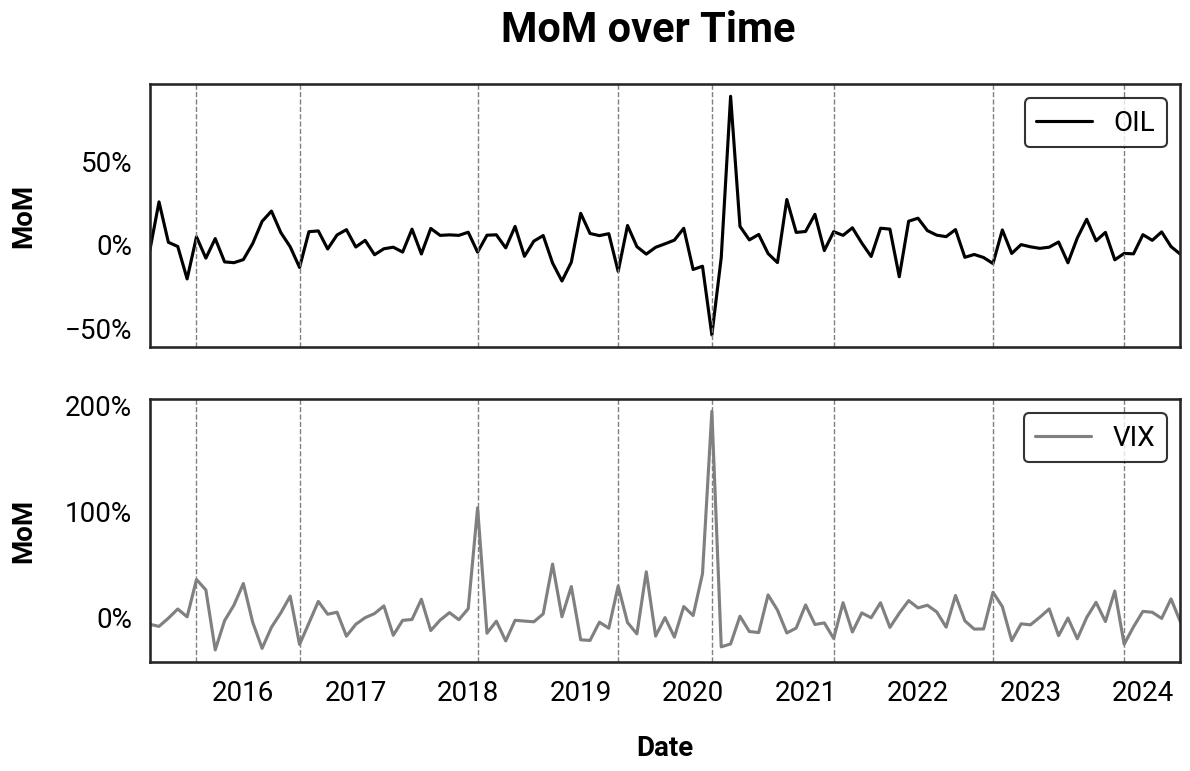

In [35]:
# Detect peaks in the VIX series. 
peaks_indices, _ = find_peaks(abs(data_pct['VIX']), distance=10)
peak_dates = data_pct.index[peaks_indices]

axes = data_pct[['OIL', 'VIX']].plot(
    subplots=True, 
    title="MoM Over Time",
    color=["black", "gray"]
)

plt.suptitle("MoM over Time", fontweight='bold', fontsize=size*1.5, color=text_color)

# Draw vertical lines at each SPY peak across both subplots
for ax in axes:
    for date in peak_dates:
        ax.axvline(x=date, color='grey', linestyle='--', linewidth=1)
    ax.legend(loc='best')
    ax.set_ylabel("MoM")
    ax.set_xlabel("Date")
    ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0, decimals=0))

plt.show()

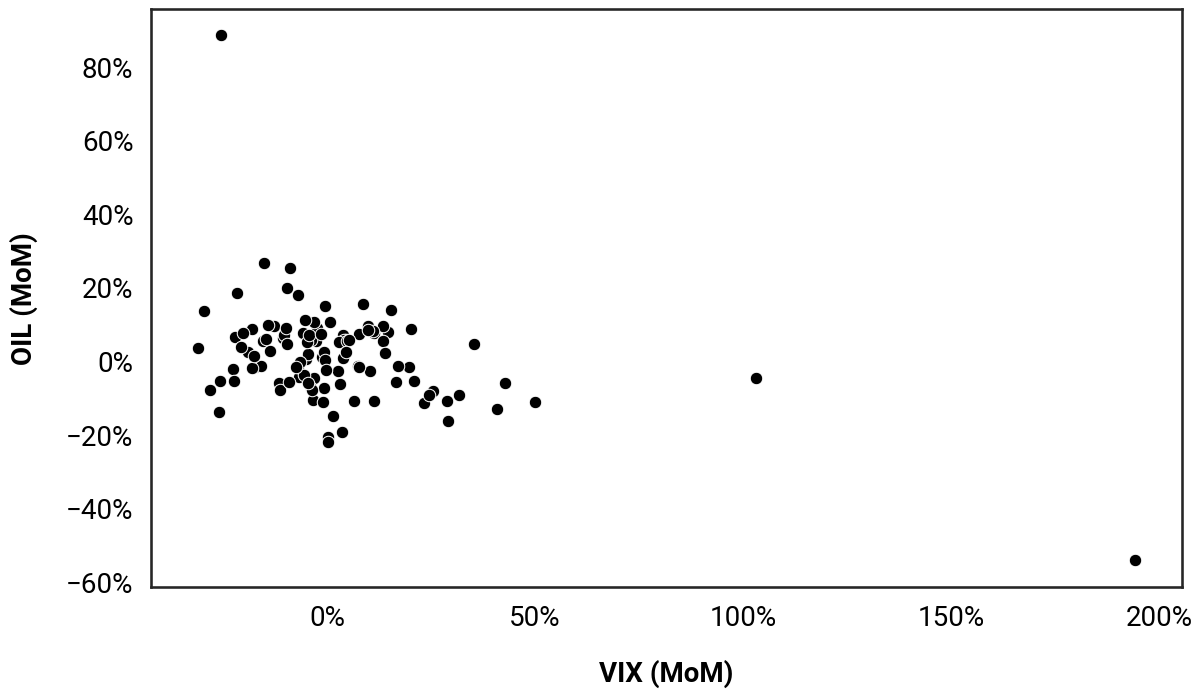

In [36]:
sns.scatterplot(x=data_pct["VIX"], y=data_pct["OIL"], color='black')
plt.xlabel("VIX (MoM)")
plt.ylabel("OIL (MoM)")

# Format tick values as percentages
ax = plt.gca()
ax.xaxis.set_major_formatter(mtick.PercentFormatter(1.0,decimals=0))
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0, decimals=0))

plt.show()

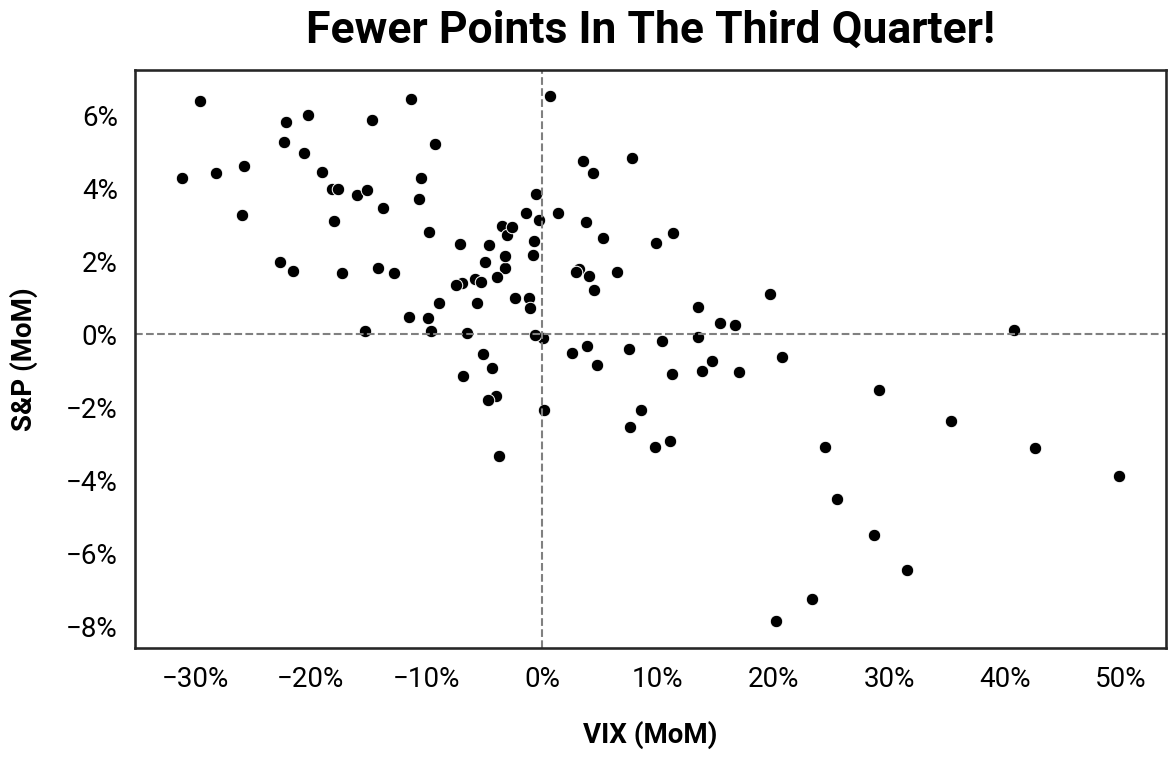

In [37]:
data_plot=data_pct[(data_pct['VIX']<0.5)&(data_pct['OIL']<0.5)]

sns.scatterplot(x=data_plot["VIX"], y=data_plot["SPY"], color='black')

# Draw horizontal and vertical lines at 0
plt.axhline(y=0, color='gray', linestyle='--', linewidth=1.5)
plt.axvline(x=0, color='gray', linestyle='--', linewidth=1.5)

plt.title("Fewer Points In The Third Quarter!", fontsize=32, fontweight='bold')
plt.xlabel("VIX (MoM)")
plt.ylabel("S&P (MoM)")

# Format tick values as percentages
ax = plt.gca()
ax.xaxis.set_major_formatter(mtick.PercentFormatter(1.0,decimals=0))
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0, decimals=0))

plt.show()

C:\Users\bahra\AppData\Local\Temp\ipykernel_21812\3211031931.py:11: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  annot = cont_table.applymap(lambda x: f"{x:.01f}%")


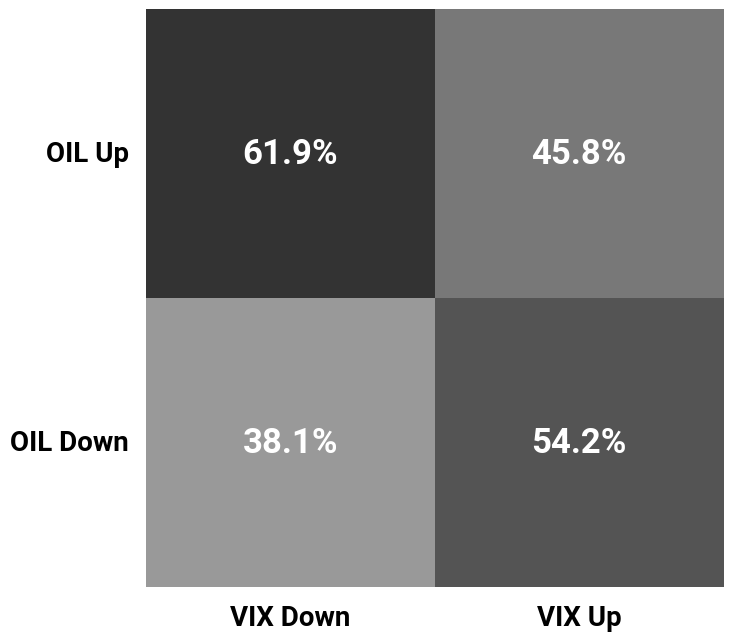

In [38]:
# Create binary columns for S&P up/down and VIX up/down
data_pct['OIL_UpDown'] = np.where(data_pct['OIL'] > 0, 'OIL Up', 'OIL Down')
data_pct['VIX_UpDown'] = np.where(data_pct['VIX'] > 0, 'VIX Up', 'VIX Down')

# Create a contingency table
cont_table = pd.crosstab(data_pct['OIL_UpDown'], data_pct['VIX_UpDown'], normalize='columns')
cont_table = cont_table.reindex(['OIL Up', 'OIL Down'])*100

grey_cmap = sns.blend_palette(["#999999","#333333"], as_cmap=True)

annot = cont_table.applymap(lambda x: f"{x:.01f}%")
sns.heatmap(cont_table, annot=annot,fmt="",cmap=grey_cmap,cbar=False, square=True, annot_kws={"fontweight": 'bold', "fontsize": 1.25*size})

plt.xlabel('')
plt.ylabel('')


ax = plt.gca()
plt.setp(ax.get_xticklabels(), fontweight="bold")
plt.setp(ax.get_yticklabels(), fontweight="bold", rotation=0, ha="right")

plt.show()

Do the same again for the pairs (DXY,XAU)

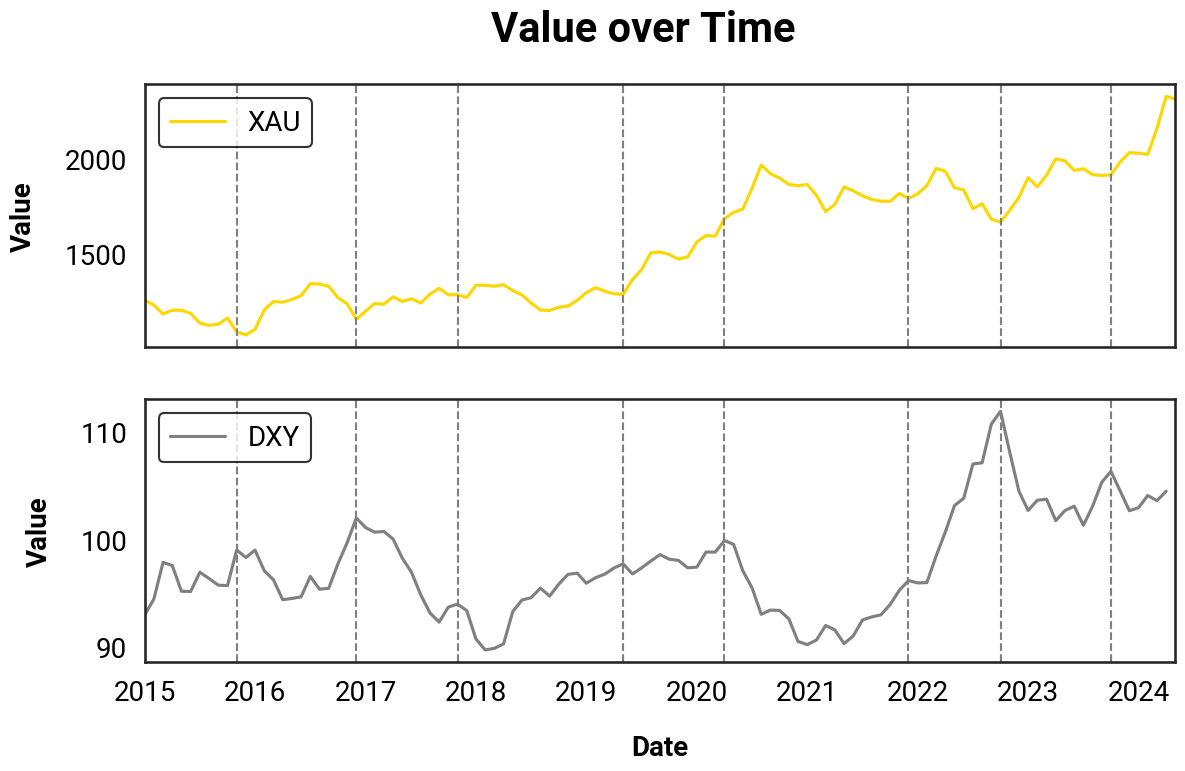

In [39]:
# Detect peaks in the DXY series.
peaks_indices, _ = find_peaks(analyzed_data['DXY'], distance=10)
peak_dates = analyzed_data.index[peaks_indices]

axes = analyzed_data[['XAU', 'DXY']].plot(
    subplots=True, 
    color=["gold", "gray"],
)

plt.suptitle("Value over Time", fontweight='bold', fontsize=size*1.5, color=text_color)

for ax in axes:
    for date in peak_dates:
        ax.axvline(x=date, color='grey', linestyle='--', linewidth=1.5)
    ax.set_title(ax.get_title())
    ax.legend(loc='upper left')
    ax.set_ylabel("Value",fontweight='bold')
    ax.set_xlabel("Date",fontweight='bold')

plt.show()

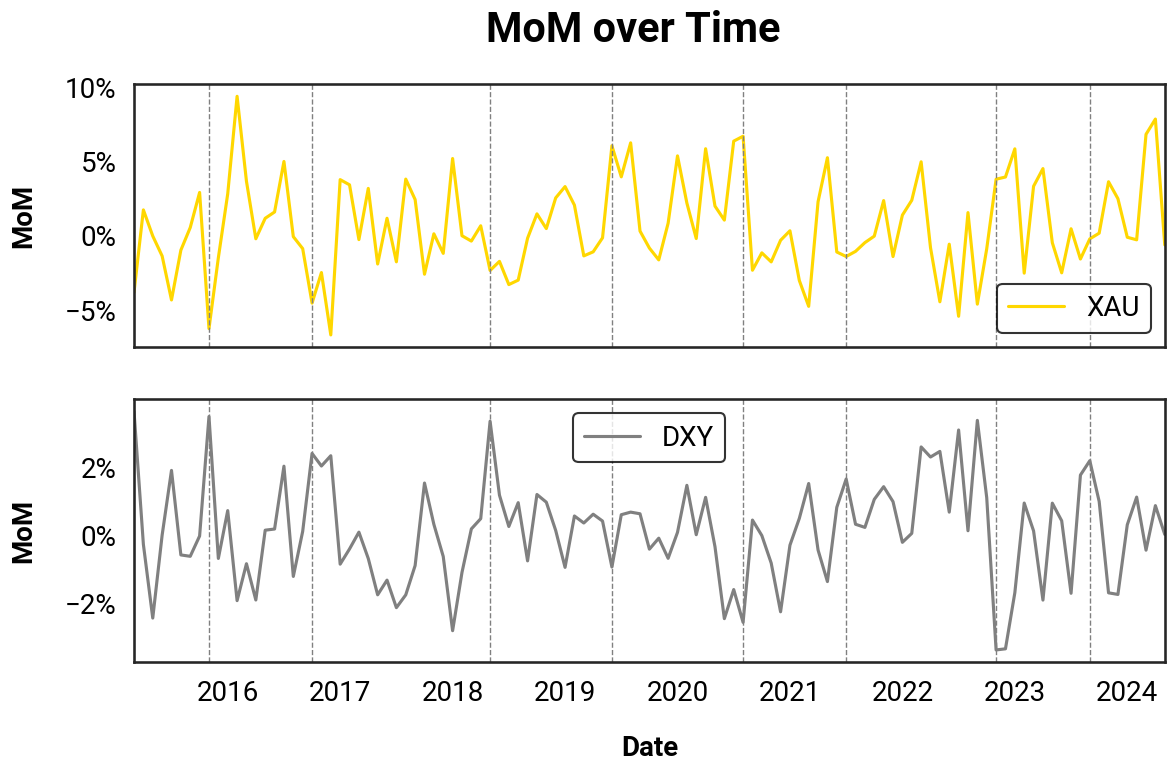

In [40]:
# Detect peaks in the DXY series. 
peaks_indices, _ = find_peaks(abs(data_pct['DXY']), distance=10)
peak_dates = data_pct.index[peaks_indices]

axes = data_pct[['XAU', 'DXY']].plot(
    subplots=True, 
    title="MoM Over Time",
    color=["gold", "gray"]
)

plt.suptitle("MoM over Time", fontweight='bold', fontsize=size*1.5, color=text_color)

# Draw vertical lines at each SPY peak across both subplots
for ax in axes:
    for date in peak_dates:
        ax.axvline(x=date, color='grey', linestyle='--', linewidth=1)
    ax.legend(loc='best')
    ax.set_ylabel("MoM")
    ax.set_xlabel("Date")
    ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0, decimals=0))

plt.show()

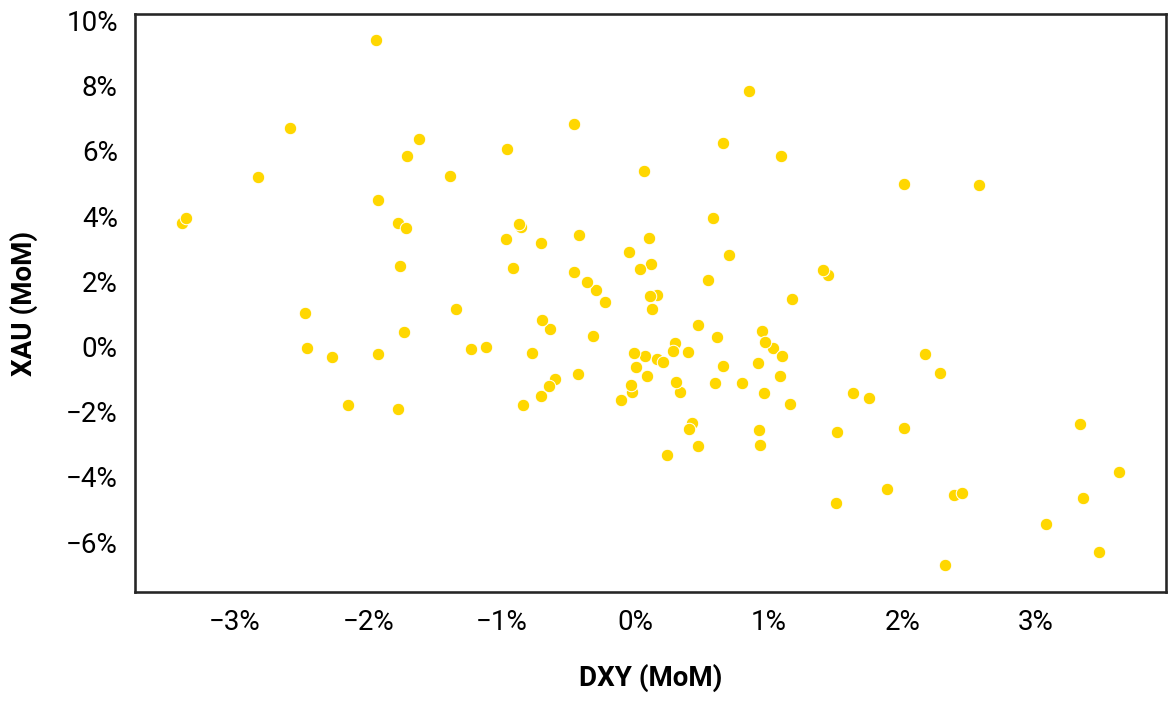

In [41]:
sns.scatterplot(x=data_pct["DXY"], y=data_pct["XAU"], color='gold')
plt.xlabel("DXY (MoM)")
plt.ylabel("XAU (MoM)")

# Format tick values as percentages
ax = plt.gca()
ax.xaxis.set_major_formatter(mtick.PercentFormatter(1.0,decimals=0))
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0, decimals=0))

plt.show()

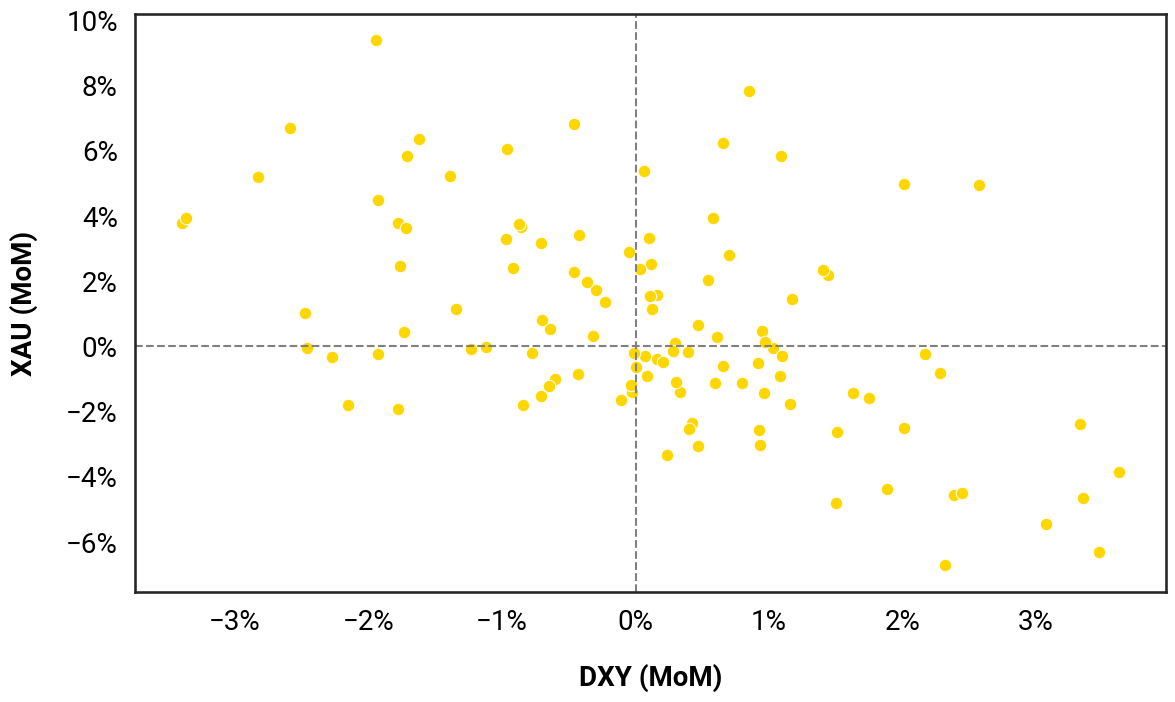

In [42]:
sns.scatterplot(x=data_pct["DXY"], y=data_pct["XAU"], color='gold')

# Draw horizontal and vertical lines at 0
plt.axhline(y=0, color='gray', linestyle='--', linewidth=1.5)
plt.axvline(x=0, color='gray', linestyle='--', linewidth=1.5)

# plt.title("Fewer Points In The Third Quarter!", fontsize=32, fontweight='bold')
plt.xlabel("DXY (MoM)")
plt.ylabel("XAU (MoM)")

# Format tick values as percentages
ax = plt.gca()
ax.xaxis.set_major_formatter(mtick.PercentFormatter(1.0,decimals=0))
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0, decimals=0))

plt.show()

C:\Users\bahra\AppData\Local\Temp\ipykernel_21812\3793403982.py:9: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  annot = cont_table.applymap(lambda x: f"{x:.01f}%")


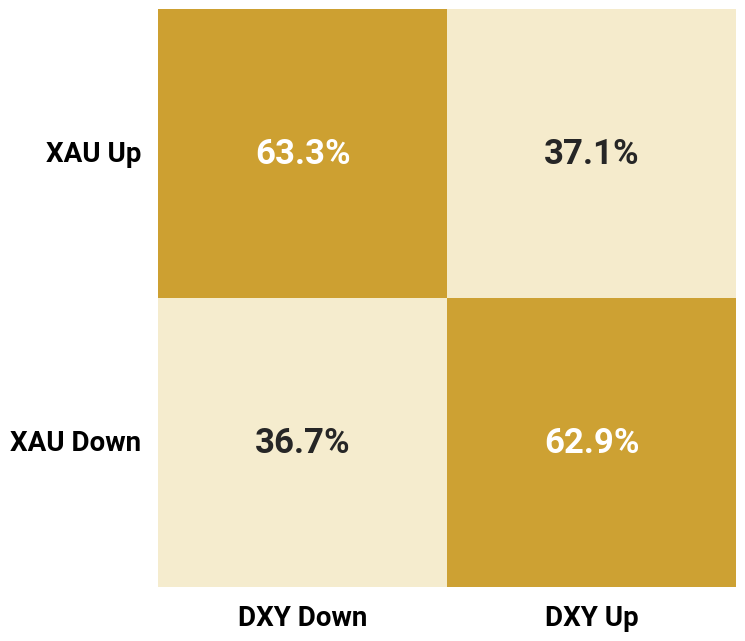

In [43]:
# Create binary columns for S&P up/down and VIX up/down
data_pct['XAU_UpDown'] = np.where(data_pct['XAU'] > 0, 'XAU Up', 'XAU Down')
data_pct['DXY_UpDown'] = np.where(data_pct['DXY'] > 0, 'DXY Up', 'DXY Down')

# Create a contingency table
cont_table = pd.crosstab(data_pct['XAU_UpDown'], data_pct['DXY_UpDown'], normalize='columns')
cont_table = cont_table.reindex(['XAU Up', 'XAU Down'])*100

annot = cont_table.applymap(lambda x: f"{x:.01f}%")
gold_cmap = sns.blend_palette(["#F5ECCE","#CDA031"], as_cmap=True)

sns.heatmap(cont_table, annot=annot,fmt="",cmap=gold_cmap,cbar=False, square=True, annot_kws={"fontweight": 'bold', "fontsize": 1.25*size})

plt.xlabel('')
plt.ylabel('')

ax = plt.gca()
plt.setp(ax.get_xticklabels(), fontweight="bold")
plt.setp(ax.get_yticklabels(), fontweight="bold", rotation=0, ha="right")

plt.show()